<a href="https://colab.research.google.com/github/Charly1368/Proyecto-G35-Modulo-II-/blob/main/Espacios_de_Probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alumno: Carlos Bustillos Araiza

## G35. Proyecto: Modulo II Modelos Estadísticos

# Estudio Completo de la Probabilidad: Clásica, Frecuentista y Geométrica

Este cuaderno explora los tres enfoques principales de la probabilidad: **clásica, frecuentista y geométrica**, con demostraciones teóricas, ejemplos prácticos y visualizaciones en Python. También se cubrieron algunos conceptos clave como **probabilidad condicional**, **independencia** y el **problema del encuentro**, junto con teoremas fundamentales como el de **Bayes** y el de la **probabilidad total**.


# 1. Probabilidad Clásica (Laplaciana)

## 1.1. Definición Formal

El modelo clásico, también llamado de **Laplace**, define la probabilidad como:

$$
P(A) = \frac{|A|}{|S|}
$$

donde:

- $ S $ es el espacio muestral (conjunto de todos los resultados posibles).
- $ A \subseteq S\ $ es un evento.
- Todos los resultados de $( S )$ son **equiprobables**.

## Teorema Fundamental

Teorema: Para cualquier evento A en un espacio muestral finito S con resultados equiprobables, la probabilidad de A está dada por la fórmula clásica.

**Demostración:**

Sea S un espacio muestral con n resultados posibles, todos igualmente probables.

Por el principio de indiferencia (Laplace), cada resultado tiene probabilidad $\frac{1}{n}$.

Para un evento A con k resultados favorables, la probabilidad es la suma de las probabilidades de los resultados favorables:

$$
P(A) = \sum_{i=1}^{k} \frac{n_1}{n_k} = \frac{n(S)}{n(A)}
$$

## 1.2. Axiomas de Kolmogórov

Cualquier función de probabilidad $ P: \mathcal{F} \rightarrow [0, 1] $ sobre un espacio muestral $ S $, debe cumplir:

1. **Axioma de No Negatividad**:  
   $$
   \forall A \in \mathcal{F}, \quad P(A) \geq 0
   $$

2. **Axioma de Normalización**:  
   $$
   P(S) = 1
   $$

3. **Aditividad Finitaria** (para eventos disjuntos):  
   $$
   A \cap B = \varnothing \Rightarrow P(A \cup B) = P(A) + P(B)
   $$

## 1.3. Teoremas Fundamentales

### Teorema 1: Probabilidad del Complemento

$$
P(A^c) = 1 - P(A)
$$

**Demostración:**

Como $ A \cup A^c = S $ y $ A \cap A^c = \varnothing $, se cumple:

$$
P(S) = P(A) + P(A^c) \Rightarrow P(A^c) = 1 - P(A)
$$

### Teorema 2: Probabilidad de la Unión

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

**Demostración:**

La unión cuenta dos veces la intersección. Usamos conteo de cardinalidad:

$$
|A \cup B| = |A| + |B| - |A \cap B| \Rightarrow \frac{|A \cup B|}{|S|} = \frac{|A|}{|S|} + \frac{|B|}{|S|} - \frac{|A \cap B|}{|S|}
$$

---

## 1.4. Aplicación: Lanzamiento de Dos Dados

Queremos calcular la probabilidad de que la **suma de dos dados sea 7**.


Probabilidad de suma 7: 0.1667


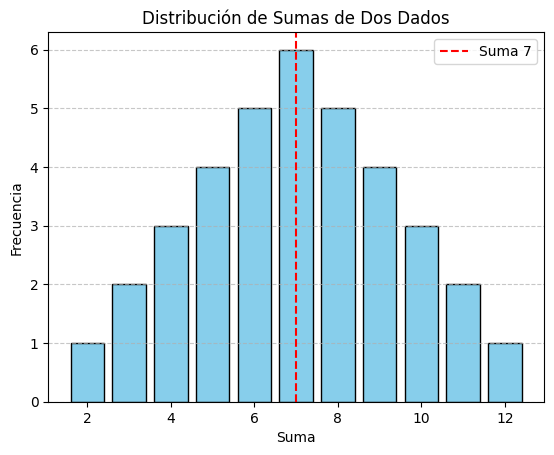

In [ ]:

import itertools
import matplotlib.pyplot as plt

# Espacio muestral: todos los pares (d1, d2)
espacio = list(itertools.product(range(1, 7), repeat=2))
n_total = len(espacio)

# Evento: suma igual a 7
evento = [p for p in espacio if sum(p) == 7]
n_favorables = len(evento)

# Probabilidad clásica
P = n_favorables / n_total
print(f"Probabilidad de suma 7: {P:.4f}")

# Crear datos para el histograma
suma_frecuencias = [sum(p) for p in espacio]
plt.hist(suma_frecuencias, bins=range(2, 14), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.axvline(7, color='red', linestyle='--', label='Suma 7')
plt.title('Distribución de Sumas de Dos Dados')
plt.xlabel('Suma')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 1.5 Ejemplo común: Lanzamiento de un dado y obtener un número par

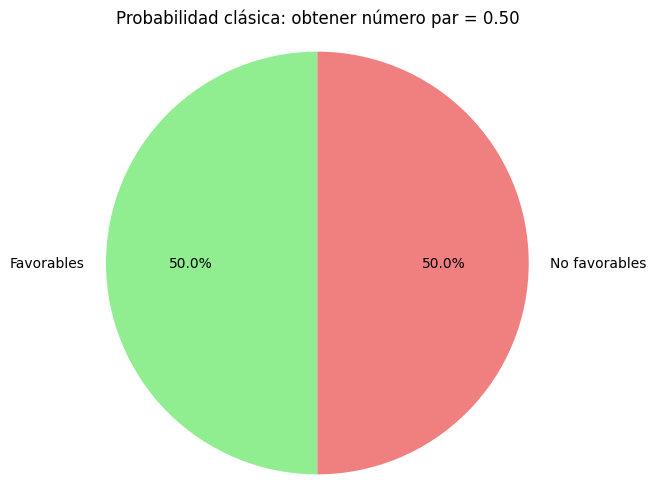

In [1]:

import matplotlib.pyplot as plt

# Espacio muestral de un dado
resultados = [1, 2, 3, 4, 5, 6]
n_total = len(resultados)

# Evento: obtener un número par
evento = [2, 4, 6]
n_favorables = len(evento)

# Calculamos la probabilidad clásica
probabilidad = n_favorables / n_total

# Visualización
labels = ['Favorables', 'No favorables']
sizes = [n_favorables, n_total - n_favorables]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f'Probabilidad clásica: obtener número par = {probabilidad:.2f}')
plt.axis('equal')
plt.show()


# 2. Probabilidad Frecuentista

## 2.1. Fundamento Teórico

La probabilidad frecuentista se basa en la **frecuencia relativa** observada de un evento en múltiples repeticiones del mismo experimento.

Sea $ A $ un evento de interés, y $ n(A) $ el número de veces que ocurre después de $ n $ repeticiones, entonces:

$$
P(A) \approx \frac{n(A)}{n}
$$

Cuando $ n \to \infty $, esta proporción converge (por la ley de los grandes números):

$$
P(A) = \lim_{n \to \infty} \frac{n(A)}{n}
$$

## Teorema Fundamental (Ley de los Grandes Números)

Teorema (Ley Débil de los Grandes Números)

Sea $X_1, X_2, \dots$ una secuencia de variables aleatorias i.i.d. con $E[X_i] = \mu$.

Entonces, para cualquier $\epsilon > 0$:
$$
\lim_{n \to \infty} P\left( \left| \frac{1}{n} \sum_{i=1}^n X_i - \mu \right| \geq \epsilon \right) = 0
$$

**Demostración:** *(usando la desigualdad de Chebyshev)*

Sea $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$:
$$
E[\overline{X}_n] = \mu \quad \text{y} \quad \text{Var}(\overline{X}_n) = \frac{\sigma^2}{n}
$$

Por Chebyshev:
$$
P\left( |\overline{X}_n - \mu| \geq \epsilon \right) \leq \frac{\text{Var}(\overline{X}_n)}{\epsilon^2} = \frac{\sigma^2}{n \epsilon^2}
$$

Cuando $n \to \infty$, el lado derecho tiende a 0.

## 2.2. Interpretación

- **No se basa en suposiciones de equiprobabilidad**, sino en la observación directa.
- Es el fundamento de la estadística inferencial y la teoría de la estimación.

## 2.3. Simulación: Lanzamiento de una moneda

Vamos a simular $ n = 10{,}000 $ lanzamientos de una moneda justa y observar cómo se estabiliza la frecuencia relativa de “sol”.


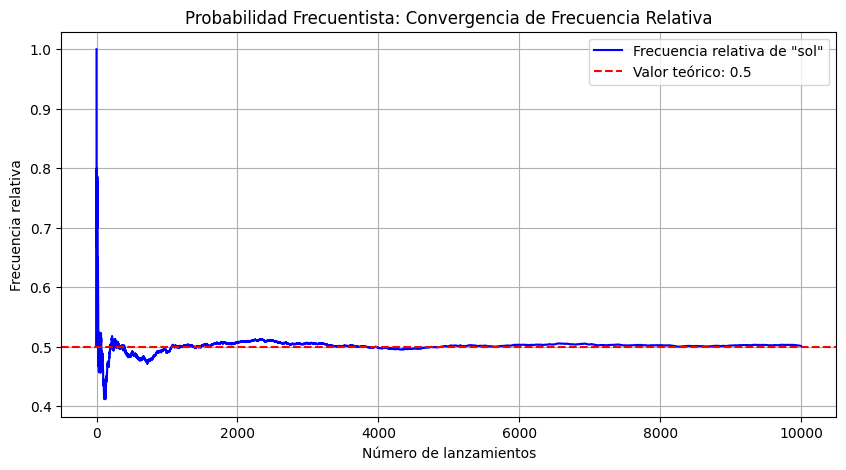

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 10000
resultados = np.random.choice(['sol', 'aguila'], size=n)
frecuencia_cara = np.cumsum(resultados == 'sol') / np.arange(1, n + 1)

plt.figure(figsize=(10, 5))
plt.plot(frecuencia_cara, label='Frecuencia relativa de "sol"', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='Valor teórico: 0.5')
plt.title('Probabilidad Frecuentista: Convergencia de Frecuencia Relativa')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Frecuencia relativa')
plt.grid(True)
plt.legend()
plt.show()


## 2.4 Ejemplo: Convergencia de frecuencias relativas

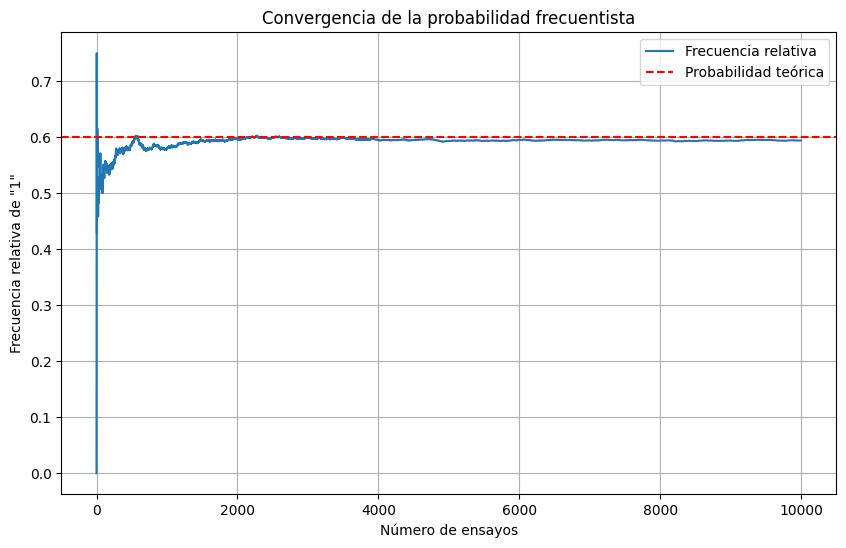

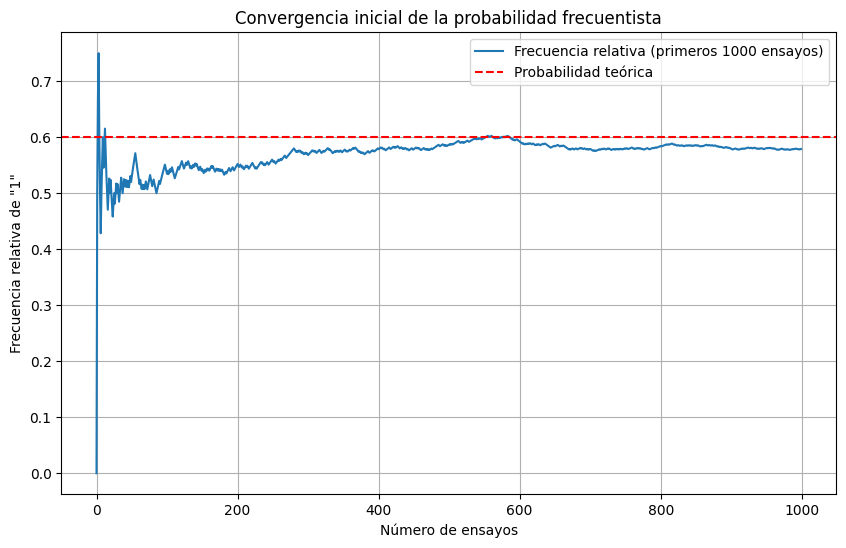

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Simulación de lanzamiento de moneda
np.random.seed(42)
n_simulations = 10000
results = np.random.choice([0, 1], size=n_simulations, p=[0.4, 0.6])  # Sesgada P(1)=0.6

# Calculamos frecuencias relativas acumuladas
frec_rel = np.cumsum(results) / np.arange(1, n_simulations+1)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(frec_rel, label='Frecuencia relativa')
plt.axhline(y=0.6, color='r', linestyle='--', label='Probabilidad teórica')
plt.xlabel('Número de ensayos')
plt.ylabel('Frecuencia relativa de "1"')
plt.title('Convergencia de la probabilidad frecuentista')
plt.legend()
plt.grid(True)

# Zoom en los primeros 1000 ensayos
plt.figure(figsize=(10, 6))
plt.plot(frec_rel[:1000], label='Frecuencia relativa (primeros 1000 ensayos)')
plt.axhline(y=0.6, color='r', linestyle='--', label='Probabilidad teórica')
plt.xlabel('Número de ensayos')
plt.ylabel('Frecuencia relativa de "1"')
plt.title('Convergencia inicial de la probabilidad frecuentista')
plt.legend()
plt.grid(True)
plt.show()


# 3. Probabilidad Geométrica

## 3.1. Fundamento Teórico

La probabilidad geométrica se aplica cuando el espacio muestral es **continuo**, como longitudes, áreas o volúmenes.

$$
P(A) = \frac{\mu(A)}{\mu(S)}
$$

donde $ \mu $ es una **medida** (longitud, área, etc.), y $ A \subseteq S $.

## Teorema Fundamental

Teorema: Sea S un espacio muestral con medida finita no nula, y A un subconjunto medible de S. Entonces la probabilidad geométrica de A está bien definida y satisface los axiomas de probabilidad.

**Demostración:**


1. $P(A) = \frac{\mu(A)}{\mu(S)} \geq 0 \text{, ya que } \mu(A) \geq 0 \text{ y } \mu(S) > 0$

2. $P(S) = \frac{\mu(S)}{\mu(S)} = 1$

3. Para una secuencia de eventos mutuamente excluyentes ${A1,A2,....:}$

$$P\left(\bigcup_{i=1}^\infty A_i\right) = \frac{\mu(S)}{\mu\left(\bigcup_{i=1}^\infty A_i\right)} = \sum_{i=1}^\infty \frac{\mu(S)}{\mu(A_i)} = \sum_{i=1}^\infty P(A_i)
$$

## 3.2. Problema del Encuentro

> Dos personas acuerdan encontrarse entre las 0 y 60 minutos. Cada una espera 15 minutos. ¿Cuál es la probabilidad de que se encuentren?

Definimos:

- $ x $: hora de llegada de la persona A
- $ y $: hora de llegada de la persona B
- Espacio muestral: cuadrado de $ [0, 60] \times [0, 60] $
- Evento favorable: $ |x - y| \leq 15 $

## 3.3. Cálculo Analítico

Área total: $ 60 \times 60 = 3600 $

Área del evento: $ 3600 - 2 \cdot \frac{1}{2} \cdot 45^2 = 1575 $

$
P(\text{encuentro}) = \frac{1575}{3600} = \frac{7}{16}
$


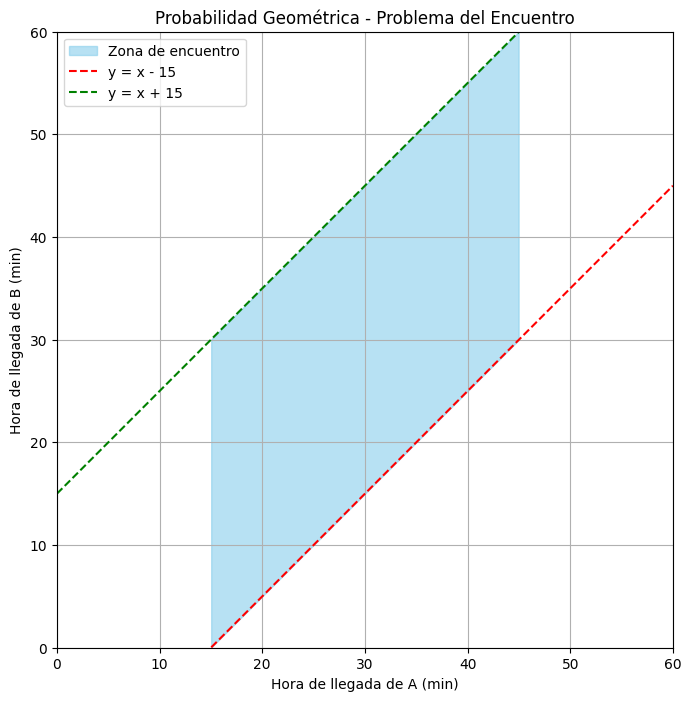

In [3]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 60, 500)
y1 = x - 15
y2 = x + 15

plt.figure(figsize=(8, 8))
plt.fill_between(x, y1, y2, where=(y1 >= 0) & (y2 <= 60), color='skyblue', alpha=0.6, label='Zona de encuentro')
plt.plot(x, y1, 'r--', label='y = x - 15')
plt.plot(x, y2, 'g--', label='y = x + 15')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel('Hora de llegada de A (min)')
plt.ylabel('Hora de llegada de B (min)')
plt.title('Probabilidad Geométrica - Problema del Encuentro')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()


## 3.4 Ejemplo: Problema de la aguja de Buffon

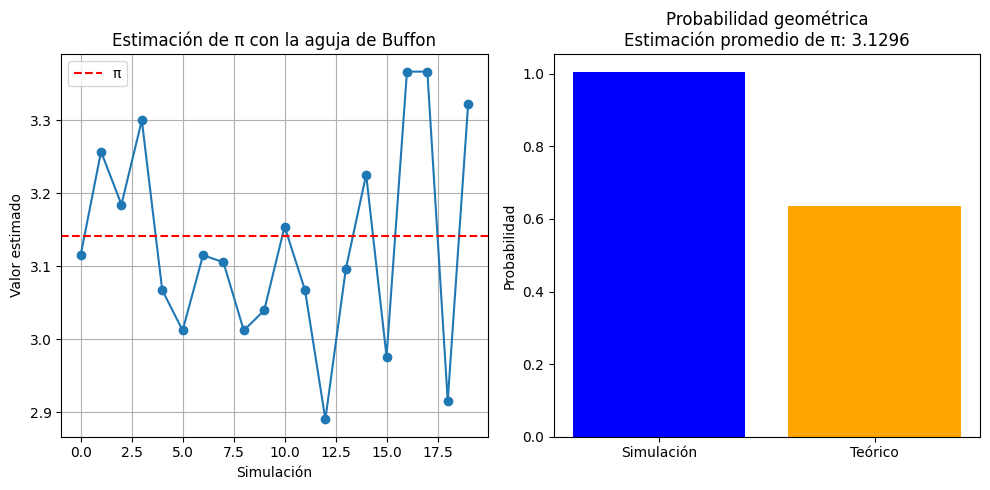

In [7]:

import numpy as np
import matplotlib.pyplot as plt

def buffon_experimento(n, l=1.0, d=2.0):
    crosses = 0
    for _ in range(n):
        theta = np.random.uniform(0, np.pi / 2)
        y = np.random.uniform(0, d / 2)
        if y <= (l / 2) * np.sin(theta):
            crosses += 1
    return (2 * l * n) / (crosses * d) if crosses > 0 else 0  # Evitar división por cero

# Estimación de π
estimates = [buffon_experimento(1000) for _ in range(20)]

# Gráfico de estimaciones
plt.figure(figsize=(10, 5))

# Subgráfico 1: Estimaciones de π
plt.subplot(1, 2, 1)
plt.plot(estimates, marker='o')
plt.axhline(np.pi, color='r', linestyle='--', label='π')
plt.title('Estimación de π con la aguja de Buffon')
plt.xlabel('Simulación')
plt.ylabel('Valor estimado')
plt.legend()
plt.grid(True)

# Subgráfico 2: Probabilidad geométrica
prob = np.mean([buffon_experimento(1000) for _ in range(100)]) / np.pi  # Probabilidad simulada
prob_teorica = (2 / np.pi)  # Probabilidad teórica
pi_est = np.mean(estimates)  # Promedio estimado de π

plt.subplot(1, 2, 2)
plt.bar(['Simulación', 'Teórico'], [prob, prob_teorica], color=['blue', 'orange'])
plt.ylabel('Probabilidad')
plt.title(f'Probabilidad geométrica\nEstimación promedio de π: {pi_est:.4f}')

# Mostrar gráficos
plt.tight_layout()
plt.show()


# 4. Probabilidad Condicional e Independencia

## 4.1. Probabilidad Condicional

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}, \quad \text{si } P(B) > 0
$$

### Interpretación:

Es la probabilidad de que ocurra $ A $ **sabemos que** ocurrió $ B $. Se reduce el espacio muestral a $ B $.

## 4.2. Independencia de Eventos

Dos eventos $ A $ y $ B $ son **independientes** si:

$$
P(A \cap B) = P(A) \cdot P(B) \quad \text{o equivalentemente} \quad P(A \mid B) = P(A)
$$

## 4.3. Ejemplo: Dos dados

- $ A $: suma de los dados = 7
- $ B $: primer dado impar


In [ ]:

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Espacio muestral
S = list(itertools.product(range(1, 7), repeat=2))
total = len(S)

# Eventos
A = [p for p in S if sum(p) == 7]
B = [p for p in S if p[0] % 2 == 1]
A_inter_B = [p for p in A if p in B]

# Cálculos
P_A = len(A) / total
P_B = len(B) / total
P_A_inter_B = len(A_inter_B) / total
P_A_dado_B = P_A_inter_B / P_B
independencia = np.isclose(P_A, P_A_dado_B)

print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(A ∩ B) = {P_A_inter_B:.4f}")
print(f"P(A | B) = {P_A_dado_B:.4f}")
print(f"¿Son independientes? {'Sí' if independencia else 'No'}")


P(A) = 0.1667
P(B) = 0.5000
P(A ∩ B) = 0.0833
P(A | B) = 0.1667
¿Son independientes? Sí


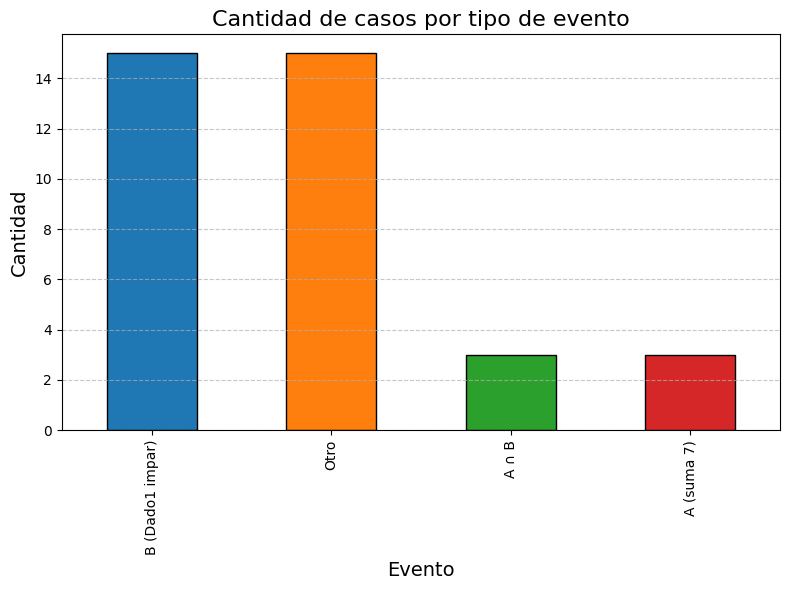

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Definir la lista de combinaciones de lanzamientos de dos dados
S = [[dado1, dado2] for dado1 in range(1, 7) for dado2 in range(1, 7)]

# Crear un DataFrame
df = pd.DataFrame(S, columns=['Dado1', 'Dado2'])

# Asignar la columna 'Evento' inicialmente como 'Otro'
df['Evento'] = 'Otro'

# Identificar eventos
df.loc[df['Dado1'] + df['Dado2'] == 7, 'Evento'] = 'A (suma 7)'
df.loc[df['Dado1'] % 2 == 1, 'Evento'] = 'B (Dado1 impar)'
df.loc[(df['Dado1'] % 2 == 1) & (df['Dado1'] + df['Dado2'] == 7), 'Evento'] = 'A ∩ B'

# Contar los casos por tipo de evento
conteo_eventos = df['Evento'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
conteo_eventos.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], edgecolor='black')

# Personalizar la gráfica
plt.title('Cantidad de casos por tipo de evento', fontsize=16)
plt.xlabel('Evento', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# 5. Teoremas de la Probabilidad Total y de Bayes

## 5.1. Teorema de la Probabilidad Total

Si $ A_1, A_2, \dots, A_n $ son una partición de $ S $, y $ B $ es cualquier evento, entonces:

$$
P(B) = \sum_{i=1}^n P(A_i) \cdot P(B \mid A_i)
$$

## 5.2. Teorema de Bayes

$$
P(A_k \mid B) = \frac{P(A_k) \cdot P(B \mid A_k)}{\sum_{i=1}^n P(A_i) \cdot P(B \mid A_i)}
$$

## 5.3. Ejemplo: Clasificación de correos electrónicos

Supongamos que:
 - El 20% de los correos son spam (P(Spam) = 0.2).
 - El 80% de los correos no son spam (P(NoSpam) = 0.8).
 - Si un correo es spam, hay un 90% de probabilidad de que contenga ciertas palabras clave (P(ClaveSpam) = 0.9).
 - Si un correo no es spam, hay un 10% de probabilidad de que contenga esas palabras clave (P(ClaveNoSpam) = 0.1).

Queremos calcular:
- La probabilidad total de que un correo contenga las palabras clave (P(Clave)).
- La probabilidad de que un correo sea spam si contiene las palabras clave (P(SpamClave)), usando el Teorema de Bayes.



Probabilidad total de que un correo contenga las palabras clave (P(Clave)) = 0.2600
Probabilidad de que un correo sea spam dado que contiene las palabras clave (P(Spam|Clave)) = 0.6923


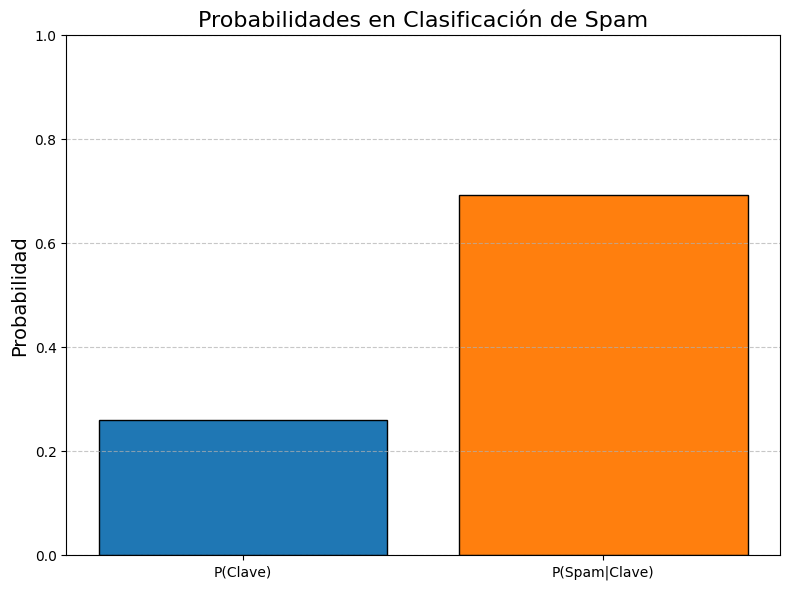

In [ ]:

# Probabilidades iniciales
P_Spam = 0.2  # Probabilidad de que un correo sea spam
P_NoSpam = 1 - P_Spam  # Probabilidad de que un correo no sea spam
P_Clave_Spam = 0.9  # Probabilidad de clave dado que es spam
P_Clave_NoSpam = 0.1  # Probabilidad de clave dado que no es spam

# Probabilidad total de que el correo contenga las palabras clave (P(Clave))
P_Clave = P_Spam * P_Clave_Spam + P_NoSpam * P_Clave_NoSpam

# Probabilidad de que un correo sea spam dado que contiene las palabras clave (P(Spam|Clave))
P_Spam_dado_Clave = (P_Spam * P_Clave_Spam) / P_Clave

# Mostrar los resultados
print(f"Probabilidad total de que un correo contenga las palabras clave (P(Clave)) = {P_Clave:.4f}")
print(f"Probabilidad de que un correo sea spam dado que contiene las palabras clave (P(Spam|Clave)) = {P_Spam_dado_Clave:.4f}")

# Visualización gráfica
import matplotlib.pyplot as plt

# Datos para la gráfica
etiquetas = ["P(Clave)", "P(Spam|Clave)"]
valores = [P_Clave, P_Spam_dado_Clave]

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.bar(etiquetas, valores, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Probabilidades en Clasificación de Spam', fontsize=16)
plt.ylabel('Probabilidad', fontsize=14)
plt.ylim(0, 1)  # Escala de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()